**Business Case: Entregable para Módulo 1 TC3006** 

**Alejandro López Hernández - A01733984**


El objetivo de este código es realizar un análisis extensivo de diferentes firmas desde el punto de vista accionista; con tal de poder comprender un poco más el comportamiento de dichas empresas a lo largo del tiempo con base a diferentes factores; empleando los conocimientos vistos en clase así como también las herramientas empleadas a lo largo de 5 semanas de clase. Se comienza leyendo los archivos csv con la herramienta pandas, obteniendo 2 data frames correspondientes a cada archivo.

In [103]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('us2022q2a.csv')
df1 = pd.read_csv('us2022q2a.csv',names = data.columns)
df1

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning:

Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670231,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.215607496,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.003237855,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.566840819,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0
324446,ZYNE,2022q2,0.0,0.0,9168.7695,0.0,-775.92786,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.14,1.14,43595.959,6.0,2022.0,2.0


In [104]:
data = pd.read_csv('usfirms2022.csv')
df2 = pd.read_csv('usfirms2022.csv', names = data.columns)
df2 = df2[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


Se hace un merge de ambos dataframe empleando funciones de pandas, empleando las columnas "firm" del df1 y "Ticker" del df2 como llaves para poder llevar a cabo la unión. Posteriormente se elimina la columna Ticker puesto que el método merge mantiene ambas columnas llave. Luego, se determinaron 4 columnas principales: firm, revenue, cogs y adjprice; por lo que se optó por hacer drop a aquellas filas que presenten valores nulos en dichas columnas

In [105]:
df = pd.merge(df1, df2, left_on='firm', right_on="Ticker")
df = df.drop(columns=['Ticker'])
df = df.drop(df[df.firm.isnull()].index)
df = df.drop(df[df.revenue.isnull()].index)
df = df.drop(df[df.cogs.isnull()].index)
df = df.drop(df[df.adjprice.isnull()].index)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.215607496,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.003237855,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.566840819,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.840347087,30.729999542,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.925521947,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


Con el dataframe fusionado, se calculó el market value y el book value de cada una de las firmas en cuestión. Para el market value se multiplicó el original price por el sharesoutstanding de cada firma; mientras que para el book value se hizo una resta entre los total assets y los total liabilities.

In [106]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

df = df.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

df = df.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\1155908327.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\1155908327.py:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.215607496,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.003237855,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.566840819,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.840347087,30.729999542,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.925521947,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


Con tal de tener una cantidad de datos más aglutinada y eficaz, se decidió agrupar las firmas en sólo una fila por cada una; esto poara poder hacer los análisis posteriores de una manera más "ligera".

In [107]:
df = [y for _, y in df.groupby('firm', as_index=False)]

Se hace un ciclo for para la obtención de valores como el operating profit, operating profit margin, el ebit score de cada empresa, etcétera.

In [108]:
for i in range(len(df)):
  df[i]['lprice'] = df[i].groupby(['firm'])['adjprice'].shift(4)
  df[i]['r'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i]['lprice'].astype(np.float))
  df[i]['r2'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i].groupby(['firm'])['adjprice'].shift(4).astype(np.float))
  df[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
  #book firm value
  x = (df[i]['originalprice'].astype(np.float) * df[i]['sharesoutstanding'].astype(np.float) )
  #profit margin measures
  df[i]['operating_profit'] = (df[i]['revenue'].astype(np.float) - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float))
  df[i]['ebit'] = (df[i]['revenue'].astype(np.float)  - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float)  - df[i]['otheropexp'].astype(np.float))
  df[i]['operating_profit_margin'] = (df[i]['ebit'].astype(np.float)  / df[i]['revenue'].astype(np.float) )

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\1204906219.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\1204906219.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\1204906219.py:7: DeprecationWarning:

`np.float` is a deprecated alias

Se emplea un segundo ciclo for para poder calcular la suma por periodo del revenue, cogs, sgae, otheropexop, extra income, finexp para poder agrupar las firmas por fila. Por otro lado, para el resto de columnas sólo se está considerando los valores del último cuarto registrado de cada empresa.

In [109]:
for i in range(len(df)):
  df[i]['revenue'] = df[i]['revenue'].astype(np.float)
  df[i]['cogs'] = df[i]['cogs'].astype(np.float)
  df[i]['sgae'] = df[i]['sgae'].astype(np.float)
  df[i]['otheropexp'] = df[i]['otheropexp'].astype(np.float)
  df[i]['extraincome'] = df[i]['extraincome'].astype(np.float)
  df[i]['finexp'] = df[i]['finexp'].astype(np.float)
  df_Final4 = df[i].tail(4)

  temp = df[i].tail(1)


  total_assets = list(temp['totalassets'])[0]
  total_liabilities = list(temp['totalliabilities'])[0]
  short_debt = list(temp['shortdebt'])[0]
  long_debt = list(temp['longdebt'])[0]
  stockholder_equity = list(temp['stockholderequity'])[0]
  adj_price = list(temp['adjprice'])[0]
  original_price = list(temp['originalprice'])[0]
  book_value = list(temp['book_value'])[0]
  market_value = list(temp['market_value'])[0]
  operating_profit = list(temp['operating_profit'])[0]
  ebit = list(temp['ebit'])[0]
  operating_profit_margin = list(temp['operating_profit_margin'])[0]
  sharesout_standing = list(temp['sharesoutstanding'])[0]
  naics = list(temp['Sector NAICS\nlevel 1'])[0]
  name = list(temp['Name'])[0]
  newDF = df_Final4.groupby('firm', as_index = False).agg({'revenue':'sum','cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum'})

  newDF['totalassets'] = total_assets
  newDF['totalliabilities'] = total_liabilities
  newDF['shortdebt'] = short_debt
  newDF['longdebt'] = long_debt
  newDF['stockholderequity'] = stockholder_equity
  newDF['adjprice'] = adj_price
  newDF['originalprice'] = original_price
  newDF['sharesoutstanding'] = sharesout_standing
  newDF['book_value'] = book_value
  newDF['market_value'] = market_value
  newDF['operating_profit'] = operating_profit
  newDF['operating_profit_margin'] = operating_profit_margin
  newDF['ebit'] = ebit
  newDF['Sector NAICS\nlevel 1'] = naics
  newDF['Name'] = name

  df[i] = newDF


C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\2054639453.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\2054639453.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\2054639453.py:4: DeprecationWarning:

`np.float` is a deprecated alias

In [110]:
mergedDF = pd.DataFrame()
for i in df:
  mergedDF = mergedDF.append(i, ignore_index = True)
mergedDF

,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,10455000,5333000,175000,...,118.56,118.77,298708.056,5122000.000,3.547756e+07,3.600000e+05,0.224020,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,15709000,8417000,1000,...,45.487956381,45.58,184448.686,7292000.000,8.407171e+06,6.570000e+05,0.200878,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,1084755,871057,NaN,...,3.25,3.25,35016.392,213698.000,1.138033e+05,4.526000e+03,0.415229,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,67963000,76385000,2106000,...,12.68,12.68,649514.848,-8422000.000,8.235848e+06,1.017000e+06,0.075771,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,379274,270173,NaN,...,2.67,2.67,20398.497,109101.000,5.446399e+04,-2.115000e+03,-0.047348,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,112738.0,25539.0,685.0,...,2.81,2.81,67209.461,87199.000,1.888586e+05,-6.700000e+03,-0.323723,-1.474300e+04,Manufacturing,Zevia Pbc
3555,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,85433.0,78828.0,0.0,...,0.9701,0.9701,34095.968,6605.000,3.307650e+04,-9.723000e+03,-0.016368,-8.410000e+02,Educational Services,Zovio Inc
3556,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,1176300.0,946900.0,5600.0,...,27.179735,27.24,125967.533,229400.000,3.431356e+06,5.380000e+04,0.188248,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3557,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,470968.0,234345.0,7900.0,...,1.23,1.23,103140.755,236623.000,1.268631e+05,-6.573600e+04,-40.317388,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc



# 2.1 General questions:



*   **By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?**

El size de una firma se puede segmentar como small, medium o big. Está división tiene su fundamento en el valor de mercado o market value obtenido a partir de las columnas originalprice * sharesoutstanding. Otros dos factores a considerar para l tamaño de la fima sería el sales performance y profitability, siendo el rendimiento que tiene una fima en sus ventas y las ganancias o rentabilidad que posee, respectivamente.

*   **Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?** 

Para el stock return se tiene que tener en cuenta el rendimiento en cuentas totales de las acciones, así como también el aumento del valor de las mismas. El rendimiento total de la acción también se considera inversamente proporcional al precio original de la acción.






#2.2.1.1 Considering the most recent financial quarter

* **Show how many firms by industry there are in the sample**

Con el agrupamiento por sector se puede mostrar la cantidad de firmas por industria, siendo la que más presencia tiene la industria manufacturera; mientras que "Accomodation and Food Services" es la industria menos presente con sólo 1 firma.

In [111]:
#d f.nunique()
mergedDF.groupby('Sector NAICS\nlevel 1')["firm"].nunique()


Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 


*   **For each industry (and for all industries)**
*   **What can you say about the typical firm size in terms of market value and book value?**
*   **How much these variables change within each industry?**
*   **How firm size (in market value) is distributed?**

La proporción podría parecer relativamente clara: a mayor númnero de firmas en una industria, mayor market value. Pero del mismo modo existen casos anómalos en los que puede haber firmas pertenecientes a una industria con pocas firmas pero aún así mantener valores de mercado altos; tal es el caso de Arts, Entertainment and Recreation.

Por otro lado, el book value entre industrias se encuentran en un rango similar; pero dentro de las firmas la variación de este se puede denotar la relación entre book value y tamaño de la firma, incluso si se hace comparación es entre 2 firmas de la misma industria.


In [112]:
# Revision de nombre de las columnas para los siguientes comandos
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')

El market value se define como el precio a mostrar de un activo y se usa como valor abierto y/o valor justo, con sus respectivas diferencias según el contexto en el que se empleen.


In [113]:
# Datos del Market Value de Cada Firma
mergedDF.groupby('firm')['market_value'].describe()



,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.547756e+07,NaN,3.547756e+07,3.547756e+07,3.547756e+07,3.547756e+07,3.547756e+07
AA,1.0,8.407171e+06,NaN,8.407171e+06,8.407171e+06,8.407171e+06,8.407171e+06,8.407171e+06
AAIC,1.0,1.138033e+05,NaN,1.138033e+05,1.138033e+05,1.138033e+05,1.138033e+05,1.138033e+05
AAL,1.0,8.235848e+06,NaN,8.235848e+06,8.235848e+06,8.235848e+06,8.235848e+06,8.235848e+06
AAME,1.0,5.446399e+04,NaN,5.446399e+04,5.446399e+04,5.446399e+04,5.446399e+04,5.446399e+04
...,...,...,...,...,...,...,...,...
ZVIA,1.0,1.888586e+05,NaN,1.888586e+05,1.888586e+05,1.888586e+05,1.888586e+05,1.888586e+05
ZVO,1.0,3.307650e+04,NaN,3.307650e+04,3.307650e+04,3.307650e+04,3.307650e+04,3.307650e+04
ZWS,1.0,3.431356e+06,NaN,3.431356e+06,3.431356e+06,3.431356e+06,3.431356e+06,3.431356e+06



Asimismo, podemos sacar valores estadísticos importantes de cada industria a partir del market value como la media o la desviación estándar

In [114]:
# Datos del Market Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['market_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,4.865183e+06,NaN,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06
Accommodation and Food Services,69.0,8.693665e+06,2.506871e+07,1.104731e+04,2.792043e+05,1.474242e+06,5.181216e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,132.0,1.378746e+07,4.460524e+07,6.078575e+03,5.259900e+05,1.961411e+06,6.399546e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.049362e+06,1.457046e+07,2.218892e+04,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.343285e+07,3.687909e+07,7.425361e+03,1.146178e+06,2.849838e+06,8.776708e+06,1.719481e+08
Construction,45.0,3.859302e+06,5.645182e+06,2.026958e+04,6.271708e+05,1.745045e+06,3.456494e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,3.307650e+04,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,697.0,8.332506e+06,2.906470e+07,9.530881e+03,3.555148e+05,1.253038e+06,4.744693e+06,4.818731e+08
Health Care and Social Assistance,64.0,3.496784e+06,6.971670e+06,1.015306e+04,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07


Se hace un bar plot basado en donde el eje x representa las industrias a las que pertenecen las firmas; mientras que el eje y representa al market_value registrado por empresa. Asimismo, esto hará un despliegue de valores según la cantidad de firmas que exista dentro de casa indsutria.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Finance and Insurance'),
  Text(2, 0, 'Transportation and Warehousing'),
  Text(3, 0, 'Retail Trade'),
  Text(4, 0, 'Wholesale Trade'),
  Text(5, 0, 'Administrative and Support and Waste Management and Remediation Services'),
  Text(6, 0, 'Professional, Scientific, and Technical Services'),
  Text(7, 0, 'Health Care and Social Assistance'),
  Text(8, 0, 'Information'),
  Text(9, 0, 'Real Estate and Rental and Leasing'),
  Text(10, 0, 'Utilities'),
  Text(11, 0, 'Construction'),
  Text(12, 0, 'Agriculture, Forestry, Fishing and Hunting'),
  Text(13, 0, 'Mining, Quarrying, and Oil and Gas Extraction'),
  Text(14, 0, 'Educational Services'),
  Text(15, 0, 'Accommodation and Food Services'),
  Text(16, 0, 'Arts, Entertainment, and Recreation'),
  Text(17, 0, 'Other Services (except Public Administration)'),
  Text(18, 0, '-')])

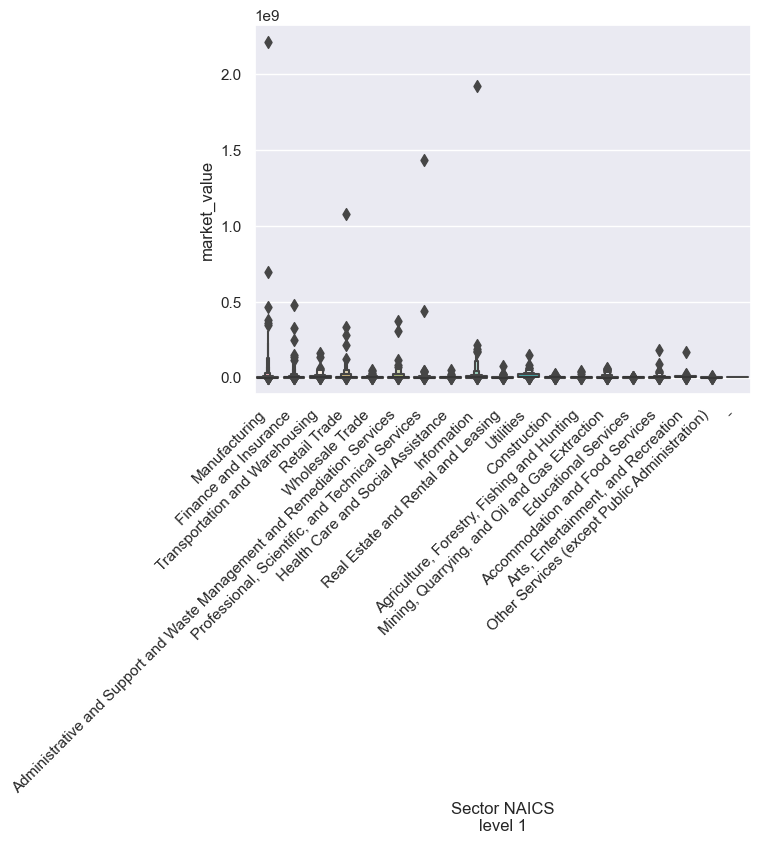

In [115]:
#Market Value
sns.boxenplot(x='Sector NAICS\nlevel 1', y='market_value', data=mergedDF)
plt.xticks(rotation = 45, ha = "right")


Con esta perspectiva, podemos obtener valores como la mediana del market value para todas las firmas; así como otros datos estadísticos en general como la media y la desviación estándar per se.

In [116]:
#Market Value median

mergedDF['market_value'].median()

1105860.1742999998

In [117]:
mergedDF['market_value'].describe()

count    3.559000e+03
mean     1.096046e+07
std      6.622548e+07
min      3.490000e+01
25%      1.932212e+05
50%      1.105860e+06
75%      4.615835e+06
max      2.212838e+09
Name: market_value, dtype: float64



El book value hace referencia al valor de una firma según sus cuentas; es decir, sus estados financieros. En un caso hipotético y a resumidas cuentas, el book value sería lo más cercano al monto que recibirían los accionistas de una empresa si algún día decidieran la liquidación de dicho negocio. Tal y como se hizo arriba con el market value, se hizo agrupación por industria y se obtuvieron los valores estadísticos de las firmas según el book value

In [118]:
# Datos del Book Value de Cada Firma
mergedDF.groupby('firm')['book_value'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,5122000.000,NaN,5122000.000,5122000.000,5122000.000,5122000.000,5122000.000
AA,1.0,7292000.000,NaN,7292000.000,7292000.000,7292000.000,7292000.000,7292000.000
AAIC,1.0,213698.000,NaN,213698.000,213698.000,213698.000,213698.000,213698.000
AAL,1.0,-8422000.000,NaN,-8422000.000,-8422000.000,-8422000.000,-8422000.000,-8422000.000
AAME,1.0,109101.000,NaN,109101.000,109101.000,109101.000,109101.000,109101.000
...,...,...,...,...,...,...,...,...
ZVIA,1.0,87199.000,NaN,87199.000,87199.000,87199.000,87199.000,87199.000
ZVO,1.0,6605.000,NaN,6605.000,6605.000,6605.000,6605.000,6605.000
ZWS,1.0,229400.000,NaN,229400.000,229400.000,229400.000,229400.000,229400.000


In [119]:
mergedDF['book_value'].describe()

count    3.559000e+03
mean     3.200436e+06
std      1.349909e+07
min     -1.479100e+07
25%      9.744857e+04
50%      4.312830e+05
75%      1.728704e+06
max      2.861430e+08
Name: book_value, dtype: float64

In [120]:
# Datos del Book Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['book_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,5.704446e+06,NaN,5704446.0,5.704446e+06,5704446.0,5704446.00,5704446.0
Accommodation and Food Services,69.0,5.019647e+05,2.440004e+06,-8658900.0,1.072699e+04,231685.0,954019.00,7289000.0
Administrative and Support and Waste Management and Remediation Services,132.0,2.677850e+06,7.116921e+06,-1026446.0,8.216000e+04,525086.0,1871825.00,46515000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,3.406701e+06,6.635579e+06,14751.0,2.128192e+05,1068506.5,3222425.00,26071000.0
"Arts, Entertainment, and Recreation",21.0,5.061617e+06,2.096327e+07,-1081020.0,-1.053470e+05,76168.0,1678528.00,96433000.0
Construction,45.0,2.483906e+06,4.236454e+06,83162.0,4.073750e+05,963495.0,2488619.00,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.0,966118.00,4322243.0
Finance and Insurance,697.0,5.269128e+06,2.022819e+07,-5438611.0,2.828350e+05,1010618.0,3259895.00,286143000.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,444065.5,1161768.25,10400700.0


Se hace un bar plot basado en donde el eje x representa las industrias a las que pertenecen las firmas; mientras que el eje y representa al book value registrado por empresa. Asimismo, esto hará un despliegue de valores según la cantidad de firmas que exista dentro de casa indsutria.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Finance and Insurance'),
  Text(2, 0, 'Transportation and Warehousing'),
  Text(3, 0, 'Retail Trade'),
  Text(4, 0, 'Wholesale Trade'),
  Text(5, 0, 'Administrative and Support and Waste Management and Remediation Services'),
  Text(6, 0, 'Professional, Scientific, and Technical Services'),
  Text(7, 0, 'Health Care and Social Assistance'),
  Text(8, 0, 'Information'),
  Text(9, 0, 'Real Estate and Rental and Leasing'),
  Text(10, 0, 'Utilities'),
  Text(11, 0, 'Construction'),
  Text(12, 0, 'Agriculture, Forestry, Fishing and Hunting'),
  Text(13, 0, 'Mining, Quarrying, and Oil and Gas Extraction'),
  Text(14, 0, 'Educational Services'),
  Text(15, 0, 'Accommodation and Food Services'),
  Text(16, 0, 'Arts, Entertainment, and Recreation'),
  Text(17, 0, 'Other Services (except Public Administration)'),
  Text(18, 0, '-')])

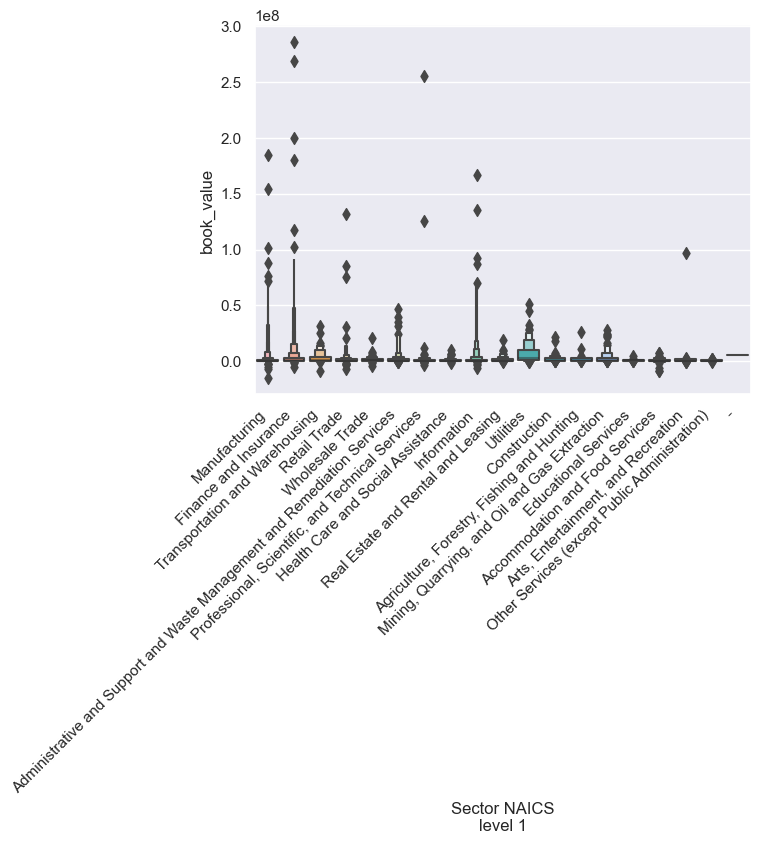

In [121]:
#Book Value

sns.boxenplot(x='Sector NAICS\nlevel 1', y='book_value', data=mergedDF)
plt.xticks(rotation = 45, ha = "right")

In [122]:
#Market Book Value

mergedDF['book_value'].median()

431283.0

*   **For each industry For each industry (and for all industries)**
*   **What can you say about profit margin of firms? show**

Analizando el porcentaje de las ganancias de las firmas por ventas se puede llegar a comprender el profit margin. A pesar de ello, se presentaron casos en los que las firmas presentaban incluso déficit en este rubro; lo que se puede traducir de cierto modo a que, en términos de ganancias, no hay ganancias.

*   **a) descriptive statistics of profit margin and**
*   **b) plot(s) to illustrate how profit margin changes across industries.**

In [123]:
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')

Resumen de las siguientes 4 vairables: revenue, cogs, sgae y ebit

In [124]:
MesuresDF = mergedDF[['firm', 'revenue', 'cogs', 'sgae', 'ebit']]
MesuresDF

,firm,revenue,cogs,sgae,ebit
0,A,6527000.0,3004000.0,2.056000e+06,3.600000e+05
1,AA,13386000.0,9653000.0,8.930000e+05,7.320000e+05
2,AAIC,31855.0,15523.0,0.000000e+00,4.526000e+03
3,AAL,40717000.0,0.0,4.160800e+07,1.017000e+06
4,AAME,195299.0,0.0,1.915230e+05,-2.115000e+03
...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,-1.474300e+04
3555,ZVO,230001.0,149303.0,1.118000e+05,-8.410000e+02
3556,ZWS,340300.0,195100.0,1.196000e+05,5.350000e+04
3557,ZY,14546.0,48949.0,2.327660e+05,-1.061960e+05


Resumen de la ganancia operativa y del margen de ganancia operativa.

In [125]:
ProfitdDF = mergedDF[['firm', 'operating_profit', 'operating_profit_margin']]
ProfitdDF

,firm,operating_profit,operating_profit_margin
0,A,3.600000e+05,0.224020
1,AA,6.570000e+05,0.200878
2,AAIC,4.526000e+03,0.415229
3,AAL,1.017000e+06,0.075771
4,AAME,-2.115000e+03,-0.047348
...,...,...,...
3554,ZVIA,-6.700000e+03,-0.323723
3555,ZVO,-9.723000e+03,-0.016368
3556,ZWS,5.380000e+04,0.188248
3557,ZY,-6.573600e+04,-40.317388


Descripción de valores correspondientes a la ganancia operativa: media, desviación estándar, valores mínimos y máximos, etcétera. Esto visto por cada firma

In [126]:
mergedDF.groupby('firm')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.600000e+05,NaN,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05
AA,1.0,6.570000e+05,NaN,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05
AAIC,1.0,4.526000e+03,NaN,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03
AAL,1.0,1.017000e+06,NaN,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06
AAME,1.0,-2.115000e+03,NaN,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-6.700000e+03,NaN,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03
ZVO,1.0,-9.723000e+03,NaN,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03
ZWS,1.0,5.380000e+04,NaN,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04


Descripción de valores correspondientes a la ganancia operativa: media, desviación estándar, valores mínimos y máximos, etcétera. Esto visto por cada industria

In [127]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,126710.000000,NaN,126710.0,126710.000000,126710.000000,126710.00,126710.0
Accommodation and Food Services,69.0,235626.853177,6.324575e+05,-142000.0,5421.000000,38904.000000,157349.00,4004100.0
Administrative and Support and Waste Management and Remediation Services,132.0,163048.920693,4.942315e+05,-713000.0,95.500000,28169.000000,142138.50,4148000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,218999.116694,4.485638e+05,-18135.0,-1480.750000,19268.000000,160333.75,1616000.0
"Arts, Entertainment, and Recreation",21.0,206017.041144,5.320416e+05,-368756.0,4515.000000,54549.000000,178094.00,2390000.0
Construction,45.0,223408.468889,4.700429e+05,-90554.0,18727.000000,70000.000000,207221.00,2168200.0
Educational Services,14.0,14396.571429,5.877502e+04,-141260.0,371.000000,16561.500000,38039.50,126641.0
Finance and Insurance,697.0,262307.167099,1.119289e+06,-1315000.0,11680.000000,41290.000000,137300.00,15128000.0
Health Care and Social Assistance,64.0,72550.071519,3.089014e+05,-204471.0,-10986.250000,300.000000,62180.75,2264000.0


Descripción de valores correspondientes al margen de ganancia operativa: media, desviación estándar, valores mínimos y máximos, etcétera. Esto visto por cada firma

In [128]:
mergedDF.groupby('firm')['operating_profit_margin'].describe()

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract



,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,0.224020,NaN,0.224020,0.224020,0.224020,0.224020,0.224020
AA,1.0,0.200878,NaN,0.200878,0.200878,0.200878,0.200878,0.200878
AAIC,1.0,0.415229,NaN,0.415229,0.415229,0.415229,0.415229,0.415229
AAL,1.0,0.075771,NaN,0.075771,0.075771,0.075771,0.075771,0.075771
AAME,1.0,-0.047348,NaN,-0.047348,-0.047348,-0.047348,-0.047348,-0.047348
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-0.323723,NaN,-0.323723,-0.323723,-0.323723,-0.323723,-0.323723
ZVO,1.0,-0.016368,NaN,-0.016368,-0.016368,-0.016368,-0.016368,-0.016368
ZWS,1.0,0.188248,NaN,0.188248,0.188248,0.188248,0.188248,0.188248


Descripción de valores correspondientes al margen de ganancia operativa: media, desviación estándar, valores mínimos y máximos, etcétera. Esto visto por cada industria

In [129]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit_margin'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,0.463653,NaN,0.463653,0.463653,0.463653,0.463653,0.463653
Accommodation and Food Services,69.0,0.100534,0.177755,-0.593442,0.022495,0.101864,0.185184,0.746437
Administrative and Support and Waste Management and Remediation Services,132.0,-2.271517,24.967468,-286.495298,-0.023688,0.065275,0.175726,0.975751
"Agriculture, Forestry, Fishing and Hunting",16.0,-0.032423,0.289292,-0.980560,-0.067080,0.041809,0.105006,0.245713
"Arts, Entertainment, and Recreation",21.0,-0.002046,0.569222,-2.043234,0.045115,0.135304,0.276587,0.606817
Construction,45.0,0.099567,0.154027,-0.543047,0.037063,0.091377,0.180423,0.539738
Educational Services,14.0,-0.001653,0.296101,-0.944201,0.007309,0.039924,0.117768,0.328612
Finance and Insurance,696.0,-inf,NaN,-inf,0.187876,0.616043,0.926012,7.453061
Health Care and Social Assistance,64.0,-inf,NaN,-inf,-0.363581,-0.038219,0.088428,0.268134


In [130]:
import plotly.express as px

**Sample de los datos para poder observar de manera más limpia los datos**

In [131]:
fig1 =px.scatter(x=mergedDF['Sector NAICS\nlevel 1'], y=mergedDF['operating_profit_margin'], template='plotly_dark')

fig1.show()

A mayor cantidad de firmas dentro de una industria, mayor será la variabilidad del profit margin dentro de la misma. Para demostrar este punto, se hace una graficación de los datos del margen de ganancia operativa vista por cada industria

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

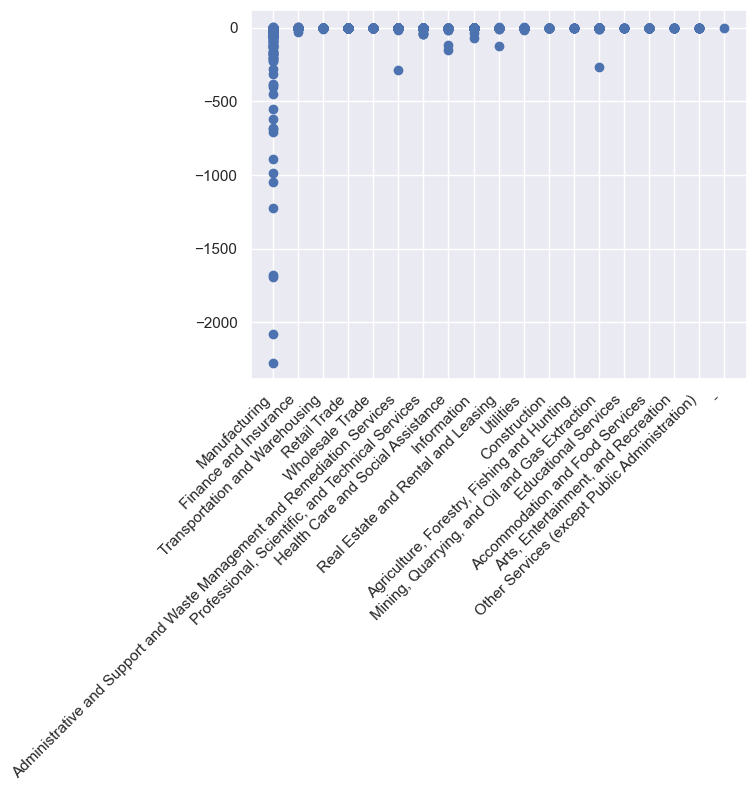

In [132]:
plt.scatter(mergedDF['Sector NAICS\nlevel 1'], mergedDF['operating_profit_margin'])


plt.xticks(rotation = 45, ha = "right")

Se hace el mismo tipo de graficación pero ahora vista por cada firma

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

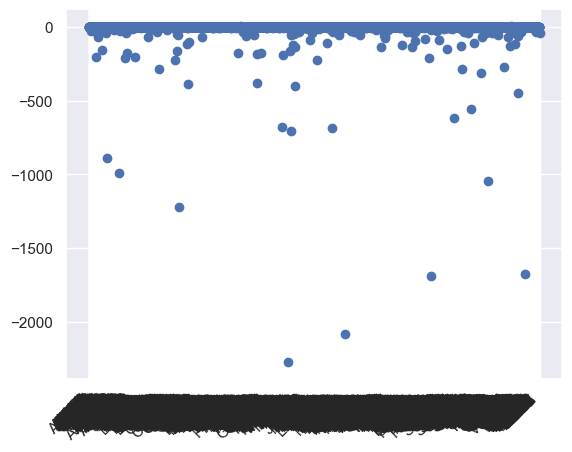

In [133]:
plt.scatter(mergedDF['firm'], mergedDF['operating_profit_margin'])


plt.xticks(rotation = 45, ha = "right")



*   **Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?**


In [134]:
mergedDF['market_value'].mean()

10960461.118705178

In [135]:
mergedDF['market_value'].nlargest(n=10)


8       2.212838e+09
2097    1.920840e+09
1379    1.435042e+09
200     1.080624e+09
3182    6.976698e+08
3263    4.818731e+08
1721    4.671001e+08
2001    4.363946e+08
2255    3.789750e+08
3300    3.743426e+08
Name: market_value, dtype: float64

In [136]:

mergedDF.loc[[8, 2097, 1379, 200, 3182, 3263, 1721, 2001, 2255, 3300],'firm']

8        AAPL
2097     MSFT
1379    GOOGL
200      AMZN
3182     TSLA
3263      UNH
1721      JNJ
2001     META
2255     NVDA
3300        V
Name: firm, dtype: object

Se encuentran empresas reconocidas y principalmente relacionadas con la tecnología como Apple, Microsoft, Google, Amazon, Tesla, Meta, etcétera.


*   **Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?**

In [137]:
mergedDF['book_value'].mean()

3200436.1636636695

In [138]:
mergedDF['book_value'].nlargest(n=10)

1727    286143000.0
374     269118000.0
1379    255419000.0
545     199626000.0
3509    184508000.0
3430    179793000.0
2097    166542000.0
861     154562000.0
3050    135307000.0
200     131402000.0
Name: book_value, dtype: float64

In [139]:
mergedDF.loc[[1727, 374, 1379, 545, 3509, 3430, 2097, 861, 3050, 200],'firm']

1727      JPM
374       BAC
1379    GOOGL
545         C
3509      XOM
3430      WFC
2097     MSFT
861       CVX
3050        T
200      AMZN
Name: firm, dtype: object

Caso relativamente contrario al market value, la empresa más grande sería JPM; dedicada a servicios financieros. Esto es basándonos en el hecho de que el book value reside más al valor teórico de una firma.


# 2.2.1.2 Considering the whole history of financial data for all firms:    

Se vuelve a leer los 2 archivos y se almacenan en un dataset con tal de poder hacer un manejo de los datos totalmente independiente a la sección anterior.

In [140]:
dataExtra = pd.read_csv('us2022q2a.csv')
df1Extra = pd.read_csv('us2022q2a.csv',names = dataExtra.columns)
df1Extra

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning:

Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670231,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.215607496,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.003237855,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.566840819,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0
324446,ZYNE,2022q2,0.0,0.0,9168.7695,0.0,-775.92786,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.14,1.14,43595.959,6.0,2022.0,2.0


In [141]:
dataExtra = pd.read_csv('usfirms2022.csv')
df2Extra = pd.read_csv('usfirms2022.csv', names = dataExtra.columns)
df2Extra = df2Extra[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2Extra

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


Se repite el proceso de fusión entre 2 data frames; así como la limpieza de nulls conforme a las variables determinadas

In [142]:
dfExtra = pd.merge(df1Extra, df2Extra, left_on='firm', right_on="Ticker")
dfExtra = dfExtra.drop(columns=['Ticker'])
dfExtra = dfExtra.drop(dfExtra[dfExtra.firm.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.revenue.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.cogs.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.adjprice.isnull()].index)
dfExtra

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.215607496,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.003237855,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.566840819,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.840347087,30.729999542,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.925521947,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing




*   **How can you measure firm profitability that can be used to compare performance among firms of different sizes?**
*   **Select and justify at least 3 measures and show descriptive statistics**

Se emplearon Boot to market ratio, short financial leverage y long financial leverage para el análisis mostrado a continuación.

Book to market ratio: Es igual al book value dividido entre el market value y determina el valor de mercado en proporción al real; siendo de mucha ayuda para considerar valores poco valorados

Un financial leverage se puede definir como la compra de activos a partir de la deuda de una firma; por lo que emplearlo en demasía puede resultar contraproducente ya que aumentaría la deuda y, por ende, el riesgo de que una firma se declare en quiebra. A pesar de ello, tiene sus ventajas en los casos en los que su uso significa un rendimiento mayor para las firmas. Para los inversionistas con acciones en empresas con alto financial leverage, las ganancias por acción se disminuye al diluir el capital.

Short financial leverage: Financial leverage en términos de tiempo más cortos como trimestres

Long financial leverage: Financial leverage a largo plazo para comprender la tendencia general de una firma.

In [143]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

dfExtra = dfExtra.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
dfExtra

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\862705970.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\862705970.py:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.215607496,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.003237855,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.566840819,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.840347087,30.729999542,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.925521947,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


Cálculo del BookToMarketRatio mediante la división del book value y el market value

In [144]:
#BookToMarketRatio = bookvalue / marketvalue
dfExtra = dfExtra.assign(BookToMarketRatio=lambda x: x.book_value.astype(np.float) / x.market_value.astype(np.float))
dfExtra 

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\456002556.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,30.729999542,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904


Resumen del Book to Market Ratio: media, desviación estándar, valores máximos, etcétera

In [145]:
dfExtra.groupby('firm')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.288494,0.120793,0.103716,0.217904,0.268915,0.343811,0.820484
AA,23.0,1.355959,0.971442,0.374854,0.809227,1.170410,1.495281,5.074055
AAIC,77.0,1.228171,0.552571,0.373104,0.941506,1.158641,1.481687,3.822178
AAL,35.0,-0.144885,0.382663,-1.022603,-0.514931,-0.001517,0.153169,0.263440
AAME,44.0,1.795551,0.629087,0.999613,1.323642,1.634052,2.083773,3.662740
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.286999,0.133422,0.148602,0.209419,0.268839,0.346420,0.461716
ZVO,44.0,0.720074,0.399884,0.199689,0.453955,0.653621,0.883630,2.098072
ZWS,41.0,0.300945,0.126009,0.028616,0.205552,0.293488,0.395857,0.503355


Book to market ratio visto para cada firma

In [146]:
Sample1dDF = dfExtra[['firm', 'BookToMarketRatio']]
Sample1dDF

,firm,BookToMarketRatio
1,A,0.139169
2,A,0.221116
3,A,0.210718
4,A,0.394756
5,A,0.378058
...,...,...
323811,ZYNE,0.401883
323812,ZYNE,0.449880
323813,ZYNE,0.597384
323814,ZYNE,0.748904


**Histogramas de industrias con base al Book to market ratio**

array([[<AxesSubplot:title={'center':'-'}>,
        <AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>],
       [<AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>,
        <AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>],
       [<AxesSubplot:title={'center':'Health Care and Social Assistance'}>,
        <AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>],
       [<AxesSubplot:title={'center':'Other Services (except Public Administration)'}>,
        <AxesSubplot:title={'center':'Professional, Scien

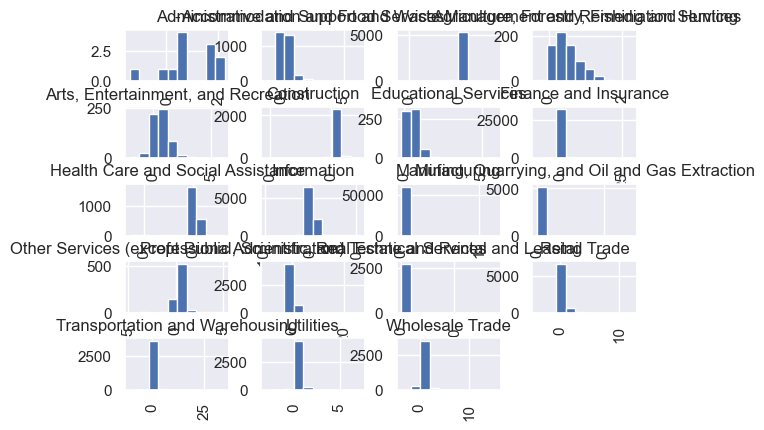

In [147]:
dfExtra.hist(column='BookToMarketRatio', by='Sector NAICS\nlevel 1')


Cálculo del short financial leverage dividiendo la deuda a corto plazo entre el número total de assets

In [148]:
#ShortFinancialLeverage = shortdebt / totalassets

dfExtra = dfExtra.assign(ShortFinancialLeverage=lambda x: x.shortdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\2729921212.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830


Resumen del short financial leverage por firma: media, desviación estándar, valores mínimos y máximos, etcétera.

In [149]:
dfExtra.groupby('firm')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.050791,0.055500,0.000000,0.021751,0.032594,0.059510,0.243941
AA,23.0,0.002537,0.010334,0.000063,0.000067,0.000075,0.000897,0.049896
AAIC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,35.0,0.041839,0.008872,0.027463,0.034723,0.039021,0.047526,0.060055
AAME,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.004057,0.001929,0.001888,0.002754,0.004131,0.005434,0.006076
ZVO,45.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZWS,41.0,0.007086,0.010558,0.000060,0.000678,0.004854,0.008571,0.062583


Short financial leverage para cada trimestre de las firmas

In [150]:
Sample2dDF = dfExtra[['firm', 'ShortFinancialLeverage']]
Sample2dDF

,firm,ShortFinancialLeverage
1,A,0.069936
2,A,0.067459
3,A,0.098516
4,A,0.060382
5,A,0.085132
...,...,...
323811,ZYNE,0.002100
323812,ZYNE,0.002307
323813,ZYNE,0.002576
323814,ZYNE,0.002830


**Histogramas de cada industria con base a su Short financial leverage**

array([[<AxesSubplot:title={'center':'-'}>,
        <AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>],
       [<AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>,
        <AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>],
       [<AxesSubplot:title={'center':'Health Care and Social Assistance'}>,
        <AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>],
       [<AxesSubplot:title={'center':'Other Services (except Public Administration)'}>,
        <AxesSubplot:title={'center':'Professional, Scien

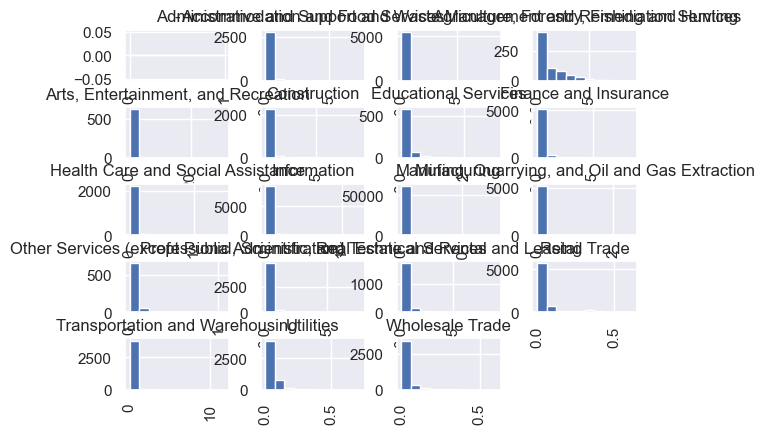

In [151]:
dfExtra.hist(column='ShortFinancialLeverage', by='Sector NAICS\nlevel 1')


Cálculo del long financial leverage dividiendo la deuda a largo plazo entre la cantidad total de assets.

In [152]:
#LongFinancialLeverage = longdebt / totalassests

dfExtra = dfExtra.assign(LongFinancialLeverage=lambda x: x.longdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\2249207736.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936,0.000000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459,0.000000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516,0.000000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382,0.000000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100,0.004770
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307,0.004569
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576,0.004357
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830,0.003976


Resumen del long financial leverage por firma: media, desviación estándar, valores mínimos y máximos, etcétera.

In [153]:
dfExtra.groupby('firm')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.193547,0.076053,0.000000,0.171441,0.206944,0.238204,0.381503
AA,23.0,0.116602,0.027216,0.079555,0.096540,0.114875,0.127486,0.178105
AAIC,78.0,0.044300,0.052730,0.000979,0.015593,0.018735,0.057950,0.206888
AAL,35.0,0.416729,0.063125,0.339314,0.360731,0.413919,0.441616,0.542572
AAME,45.0,0.107555,0.018407,0.083265,0.090759,0.104938,0.128502,0.150019
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.001865,0.002161,0.000008,0.000025,0.001647,0.003487,0.004155
ZVO,45.0,0.000712,0.004776,0.000000,0.000000,0.000000,0.000000,0.032038
ZWS,41.0,0.479835,0.102009,0.322382,0.385156,0.465212,0.574085,0.631874


In [154]:
Sample3dDF = dfExtra[['firm', 'LongFinancialLeverage']]
Sample3dDF

,firm,LongFinancialLeverage
1,A,0.000000
2,A,0.000000
3,A,0.000000
4,A,0.000000
5,A,0.000000
...,...,...
323811,ZYNE,0.004770
323812,ZYNE,0.004569
323813,ZYNE,0.004357
323814,ZYNE,0.003976


**Histogramas de cada industria con base a su Long financial leverage**

array([[<AxesSubplot:title={'center':'-'}>,
        <AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>],
       [<AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>,
        <AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>],
       [<AxesSubplot:title={'center':'Health Care and Social Assistance'}>,
        <AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>],
       [<AxesSubplot:title={'center':'Other Services (except Public Administration)'}>,
        <AxesSubplot:title={'center':'Professional, Scien

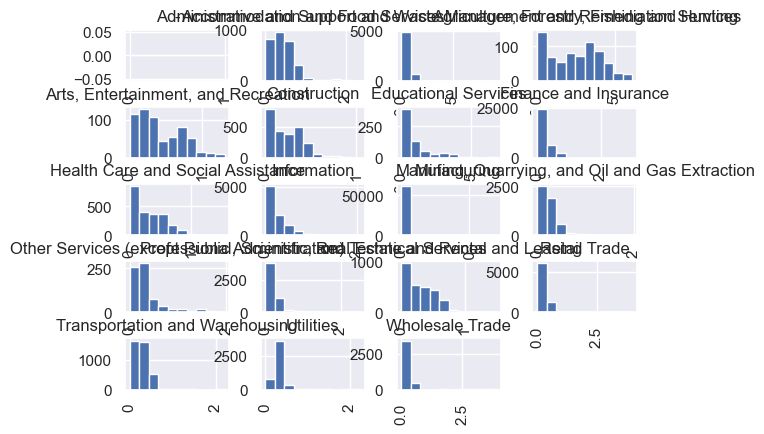

In [155]:
dfExtra.hist(column='LongFinancialLeverage', by='Sector NAICS\nlevel 1')




*   **Calculate and explain earnings per share deflated by price.**




In [156]:
dfExtra.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage'],
      dtype='object')


Earnings per share: Es el beneficio de una firma dividido por sus acciones de capital social. Es un indicador de la rentabilidad que puede presentar una empresa.

A continución se muestra el cálculo del ya mencionado EPS, así como también del ingreso neto

In [157]:
#EPS = netincome / #SharesOutstanding
#netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome

dfExtra = dfExtra.assign(netincome=lambda x: x.revenue.astype(np.float) - x.cogs.astype(np.float) - x.sgae.astype(np.float) - x.otheropexp.astype(np.float) - x.incometax.astype(np.float) - x.finexp.astype(np.float) + x.extraincome.astype(np.float))

dfExtra = dfExtra.assign(EPS=lambda x: x.netincome.astype(np.float) / x.sharesoutstanding.astype(np.float) )

dfExtra['EPS']


C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\2588218004.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\2588218004.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



1         0.367036
2         0.342152
3         0.668323
4         0.337150
5         0.210032
            ...   
323811   -0.241205
323812   -0.256530
323813   -0.213867
323814   -0.200029
323815   -0.226007
Name: EPS, Length: 153245, dtype: float64

Graficación del EPS para cada firma

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

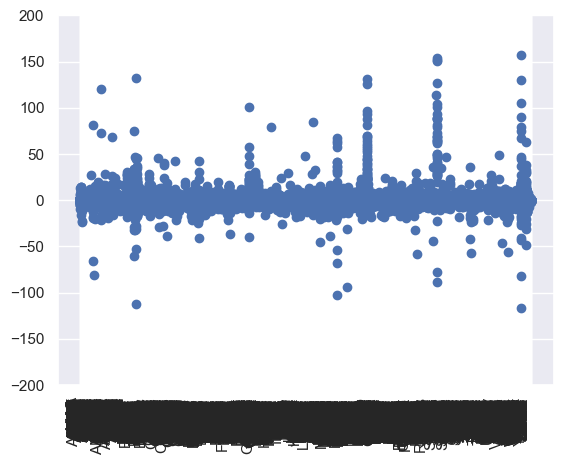

In [158]:
plt.scatter(dfExtra['firm'], dfExtra['EPS'])
plt.ylim([-200,200])

plt.xticks(rotation = 90, ha = "right")

Graficación del EPS desde la perspectiva de cada industria

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

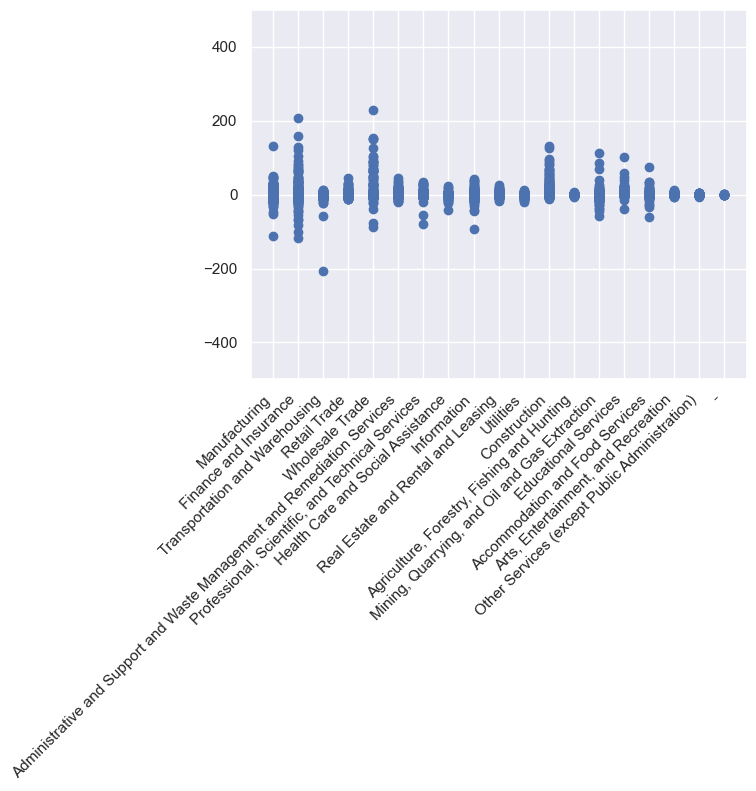

In [159]:
plt.scatter(dfExtra['Sector NAICS\nlevel 1'], dfExtra['EPS'])
plt.ylim([-500,500])
plt.xticks(rotation = 45, ha = "right")

El rango de EPS para casi todas las firmas se encuentra cercano a 0 para cada una de las industrias; por lo que pareciera una línea recta. Por otro lado, es interesante ver cómo para la manufactura, industria con más firmas, presenta un EPS negativo.

In [160]:
dfExtra.groupby('firm')['EPS'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.420154,0.882221,-3.272292,0.212429,0.440763,0.636054,6.500151
AA,23.0,0.107468,1.385143,-2.166711,-1.059465,0.230570,0.872640,2.976438
AAIC,77.0,0.148678,1.799500,-2.562073,-0.202300,0.192839,0.547008,13.361668
AAL,35.0,-0.058771,2.753022,-9.438679,0.145322,0.740485,1.294718,5.205247
AAME,44.0,0.055248,0.145597,-0.395677,0.011156,0.045079,0.099880,0.580378
...,...,...,...,...,...,...,...,...
ZVIA,4.0,-0.260217,0.116521,-0.400173,-0.334244,-0.238637,-0.164610,-0.163422
ZVO,44.0,-0.044586,0.498383,-1.778515,-0.218795,-0.011200,0.214259,0.905355
ZWS,41.0,0.202404,0.292077,-0.596276,0.119546,0.243112,0.367039,0.785181


Ordenamiento de las firmas por EPS de valor más bajo a valor más alto.

In [161]:
sorted_df = dfExtra.sort_values(by=['EPS'], ascending=False)
sorted_df.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
19973,APA,2022q2,3052000,0,1529000,0,-226000,0,394000,13839000,...,2,Apache Corp,"Mining, Quarrying, and Oil and Gas Extraction",3.490000e+01,2490000.0,71346.704871,0.009032,0.352988,903000.0,903000.000000
313754,WLK,2004q3,572031.0,487520.0,15055.0,516.0,-12884.0,10144.0,17595.0,1505866.0,...,3.0,Westlake Corp,Manufacturing,2.486450e+01,722938.0,29075.107080,0.000797,0.230558,28317.0,25396.412556
256495,SEB,2020q4,1990000.0,1760000.0,88000.0,0.0,124000.0,-3000.0,4000.0,6399000.0,...,4,Seaboard Corp,Wholesale Trade,3.518321e+06,3828000.0,1.088019,0.060634,0.160181,265000.0,228.294964
316703,WTM,2021q4,944800.0,0.0,313300.0,0.0,-7200.0,0.0,-3300.0,7000700.0,...,4.0,White Mountains Insurance Group Ltd,Finance and Insurance,3.059719e+06,3704700.0,1.210797,NaN,0.070036,627600.0,207.967998
316699,WTM,2020q4,520800.0,0.0,163500.0,0.0,14300.0,0.0,-117600.0,4831400.0,...,4.0,White Mountains Insurance Group Ltd,Finance and Insurance,3.104058e+06,3817900.0,1.229970,NaN,0.074285,489200.0,157.704147


# 2.2.2 About statistical modeling

**You have to select a group of firms according to their general industry classification:**

*   Manufacturing industries
*   Commercial industries (retail and wholesale)
*   Service industries
*   Financial services

**Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.**


*   **Do histograms for each factor/variables and interpret them**
*   **Do plots to visualize the possible relationship each factor might have with the dependent variable.**
*   **Show descriptive statistics of these factors**

En mi caso particular, me tocó realizar este análisis acerca del extensivo campo de los servicios, que realmente abarcan muchas industrias. El proceso a continuación hace el agrupamiento de todas las firmas cuya industria incluyas explícitamente "services"; para así tener un dataframe con todas las firmas pertenecientes a los servicios.

In [162]:
dfExtra.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 

In [163]:
df_Services = dfExtra[(dfExtra['Sector NAICS\nlevel 1']=='Accommodation and Food Services') | (dfExtra['Sector NAICS\nlevel 1']=='Administrative and Support and Waste Management and Remediation Services') | (dfExtra['Sector NAICS\nlevel 1']=='Arts, Entertainment, and Recreation') | (dfExtra['Sector NAICS\nlevel 1']=='Educational Services') | (dfExtra['Sector NAICS\nlevel 1']=='Health Care and Social Assistance') | (dfExtra['Sector NAICS\nlevel 1']=='Information') | (dfExtra['Sector NAICS\nlevel 1']=='Other Services (except Public Administration)') |  (dfExtra['Sector NAICS\nlevel 1']=='Professional, Scientific, and Technical Services') | (dfExtra['Sector NAICS\nlevel 1']== 'Transportation and Warehousing')].copy()


df_Services

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
325,AAL,2013q4,7368000,0,7207000,0,-2238000,248000,-324000,42278000,...,4,American Airlines Group Inc,Transportation and Warehousing,5.353000e+06,-2731000.0,-0.510181,0.034202,0.363144,-2001000.0,-9.438679
326,AAL,2014q1,9995000,0,9265000,0,-1000,236000,13000,43737000,...,1,American Airlines Group Inc,Transportation and Warehousing,1.725753e+07,1095000.0,0.063451,0.032947,0.348538,480000.0,1.017991
327,AAL,2014q2,11355000,0,9956000,0,11000,206000,340000,44811000,...,2,American Airlines Group Inc,Transportation and Warehousing,3.093963e+07,4086000.0,0.132064,0.033987,0.339314,864000.0,1.199673
328,AAL,2014q3,11139000,0,9879000,0,-108000,203000,7000,44173000,...,3,American Airlines Group Inc,Transportation and Warehousing,2.554925e+07,4971000.0,0.194565,0.032576,0.354311,942000.0,1.308147
329,AAL,2014q4,10160000,0,9300000,0,-82000,211000,-30000,43771000,...,4,American Airlines Group Inc,Transportation and Warehousing,3.846684e+07,2021000.0,0.052539,0.039021,0.370017,597000.0,0.832330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323721,ZY,2021q2,5887.0,21829.0,81717.0,0.0,-435.0,2755.0,-16.0,725448.0,...,2.0,Zymergen Inc,"Professional, Scientific, and Technical Services",4.013994e+06,569345.0,0.141840,0.000000,0.110154,-100833.0,-1.005066
323722,ZY,2021q3,4082.0,17179.0,60956.0,21193.0,-199.0,2802.0,-18.0,627336.0,...,3.0,Zymergen Inc,"Professional, Scientific, and Technical Services",1.348474e+06,476816.0,0.353597,0.127876,0.000000,-98229.0,-0.959363
323723,ZY,2021q4,3039.0,9583.0,57090.0,7615.0,-412.0,6400.0,77.0,522396.0,...,4.0,Zymergen Inc,"Professional, Scientific, and Technical Services",6.850613e+05,408486.0,0.596277,0.084137,0.000000,-78138.0,-0.763060
323724,ZY,2022q1,4791.0,12455.0,56082.0,-130.0,-532.0,7994.0,-26.0,618189.0,...,1.0,Zymergen Inc,"Professional, Scientific, and Technical Services",2.980191e+05,344064.0,1.154503,0.093572,0.293062,-72116.0,-0.699335


In [164]:
df_Services.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
Accommodation and Food Services                                              69
Administrative and Support and Waste Management and Remediation Services    132
Arts, Entertainment, and Recreation                                          21
Educational Services                                                         14
Health Care and Social Assistance                                            64
Information                                                                 260
Other Services (except Public Administration)                                16
Professional, Scientific, and Technical Services                            144
Transportation and Warehousing                                               69
Name: firm, dtype: int64

In [165]:
df_Services.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage',
       'netincome', 'EPS'],
      dtype='object')

In [166]:
#EPSP = EPS \ NetIncome('adjprice')

df_Services = df_Services.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.originalprice.astype(np.float) )

df_Services

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\578748215.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP
325,AAL,2013q4,7368000,0,7207000,0,-2238000,248000,-324000,42278000,...,American Airlines Group Inc,Transportation and Warehousing,5.353000e+06,-2731000.0,-0.510181,0.034202,0.363144,-2001000.0,-9.438679,-0.373809
326,AAL,2014q1,9995000,0,9265000,0,-1000,236000,13000,43737000,...,American Airlines Group Inc,Transportation and Warehousing,1.725753e+07,1095000.0,0.063451,0.032947,0.348538,480000.0,1.017991,0.027814
327,AAL,2014q2,11355000,0,9956000,0,11000,206000,340000,44811000,...,American Airlines Group Inc,Transportation and Warehousing,3.093963e+07,4086000.0,0.132064,0.033987,0.339314,864000.0,1.199673,0.027925
328,AAL,2014q3,11139000,0,9879000,0,-108000,203000,7000,44173000,...,American Airlines Group Inc,Transportation and Warehousing,2.554925e+07,4971000.0,0.194565,0.032576,0.354311,942000.0,1.308147,0.036870
329,AAL,2014q4,10160000,0,9300000,0,-82000,211000,-30000,43771000,...,American Airlines Group Inc,Transportation and Warehousing,3.846684e+07,2021000.0,0.052539,0.039021,0.370017,597000.0,0.832330,0.015520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323721,ZY,2021q2,5887.0,21829.0,81717.0,0.0,-435.0,2755.0,-16.0,725448.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",4.013994e+06,569345.0,0.141840,0.000000,0.110154,-100833.0,-1.005066,-0.025120
323722,ZY,2021q3,4082.0,17179.0,60956.0,21193.0,-199.0,2802.0,-18.0,627336.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",1.348474e+06,476816.0,0.353597,0.127876,0.000000,-98229.0,-0.959363,-0.072845
323723,ZY,2021q4,3039.0,9583.0,57090.0,7615.0,-412.0,6400.0,77.0,522396.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",6.850613e+05,408486.0,0.596277,0.084137,0.000000,-78138.0,-0.763060,-0.114060
323724,ZY,2022q1,4791.0,12455.0,56082.0,-130.0,-532.0,7994.0,-26.0,618189.0,...,Zymergen Inc,"Professional, Scientific, and Technical Services",2.980191e+05,344064.0,1.154503,0.093572,0.293062,-72116.0,-0.699335,-0.241984


Se hace una "limpieza" para los histogramas, que no es más que una limitación para los percentiles en un rango de 0.025 a 0.975 para omitir anomalías y tener una modelación más concreta.

In [167]:
df_Services.groupby('Sector NAICS\nlevel 1')['EPSP'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.000441,0.086882,-2.090190,0.002551,0.009453,0.015101,0.769951
Administrative and Support and Waste Management and Remediation Services,5483.0,-0.004273,0.120937,-5.029408,0.000054,0.008319,0.014006,1.459035
"Arts, Entertainment, and Recreation",616.0,-0.014728,0.113274,-1.604833,-0.014838,0.003367,0.015723,0.179043
Educational Services,697.0,-0.005168,0.070065,-0.564628,-0.000100,0.009303,0.016841,0.267409
Health Care and Social Assistance,2262.0,-0.033143,0.295434,-10.719325,-0.018791,0.006603,0.014958,0.931305
Information,8767.0,-0.016482,0.232303,-9.230902,-0.006501,0.003044,0.011123,3.139017
Other Services (except Public Administration),719.0,-0.026489,0.210846,-3.774593,-0.003530,0.008724,0.015737,0.581818
"Professional, Scientific, and Technical Services",5094.0,-0.023253,0.269076,-14.018716,-0.008719,0.005433,0.012061,1.305551
Transportation and Warehousing,3772.0,-0.011767,0.309898,-15.457564,0.005757,0.012594,0.019378,2.365267


<AxesSubplot:>

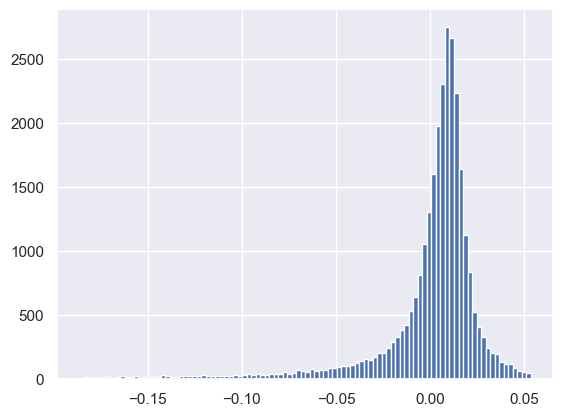

In [168]:
df_Services[(df_Services['EPSP'] < df_Services['EPSP'].quantile(.975)) & (df_Services['EPSP'] > df_Services['EPSP'].quantile(.025))]['EPSP'].hist(bins=100)

El histograma muestra un ligero sesgo hacia la derecha, con centro cercano al 0.01 con valores pico en la frecuancia cercanos a 2000

In [169]:
df_Services.groupby('Sector NAICS\nlevel 1')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.387211,0.509152,-1.279225,0.113126,0.265284,0.541144,6.347458
Administrative and Support and Waste Management and Remediation Services,5483.0,0.367533,0.614831,-11.469108,0.145777,0.298134,0.510748,7.228003
"Arts, Entertainment, and Recreation",616.0,0.335582,0.427338,-1.026576,0.033378,0.285142,0.540609,3.076717
Educational Services,697.0,0.590080,0.509338,-0.195304,0.257208,0.502143,0.788192,5.940190
Health Care and Social Assistance,2262.0,0.451662,0.766682,-12.916357,0.198295,0.355827,0.585452,6.363197
Information,8767.0,0.409983,0.632293,-9.812714,0.109836,0.263720,0.551094,10.902423
Other Services (except Public Administration),719.0,0.391026,0.619763,-4.858867,0.186486,0.390131,0.593318,5.189368
"Professional, Scientific, and Technical Services",5094.0,0.387205,0.835076,-10.101796,0.144247,0.311076,0.571189,26.225984
Transportation and Warehousing,3772.0,0.692097,1.584601,-10.923350,0.256123,0.481675,0.809073,34.816437


<AxesSubplot:>

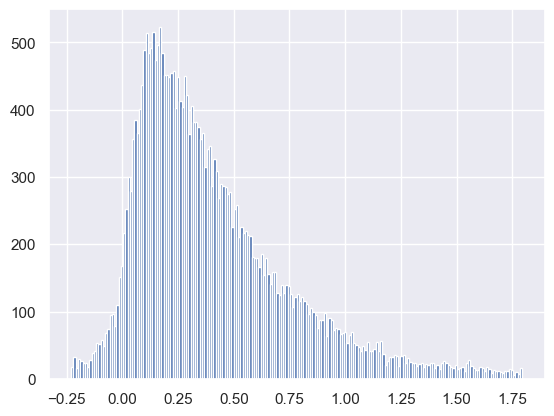

In [170]:
df_Services[(df_Services['BookToMarketRatio'] < df_Services['BookToMarketRatio'].quantile(.975)) & (df_Services['BookToMarketRatio'] > df_Services['BookToMarketRatio'].quantile(.025))]['BookToMarketRatio'].hist(bins=200)

El histograma muestra un claro sesgo hacia la izquierda, con centro cercano al 0.2 con valores pico en la frecuancia cercanos a 500. Contrario al histograma anterior, acá se presenta una mayor distribución de los datos 

In [171]:
df_Services.groupby('Sector NAICS\nlevel 1')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2921.0,0.022788,0.036491,0.0,0.001105,0.010989,0.031369,0.746012
Administrative and Support and Waste Management and Remediation Services,5522.0,0.035633,0.119775,0.0,0.000000,0.008678,0.032651,4.287887
"Arts, Entertainment, and Recreation",622.0,0.070114,1.251303,0.0,0.005284,0.009718,0.021759,31.170158
Educational Services,704.0,0.017772,0.033285,0.0,0.000000,0.003452,0.022485,0.302018
Health Care and Social Assistance,2293.0,0.031978,0.061970,0.0,0.002917,0.012127,0.034997,1.483479
Information,8877.0,0.031666,0.095121,0.0,0.000000,0.005315,0.021296,1.244665
Other Services (except Public Administration),724.0,0.037336,0.075114,0.0,0.003226,0.012952,0.035715,1.077025
"Professional, Scientific, and Technical Services",5171.0,0.028669,0.074236,0.0,0.000000,0.005556,0.023041,0.771211
Transportation and Warehousing,3805.0,0.072287,0.495148,0.0,0.006368,0.024384,0.047999,11.767511


<AxesSubplot:>

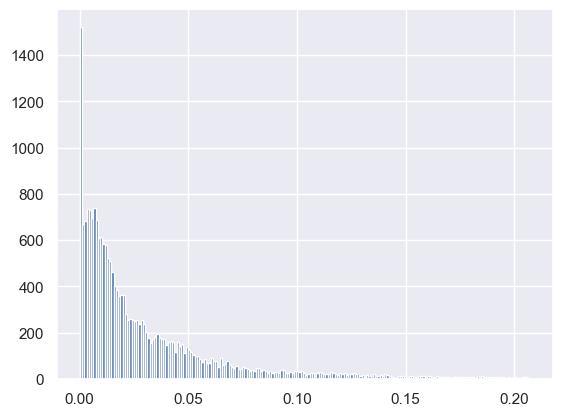

In [172]:
df_Services[(df_Services['ShortFinancialLeverage'] < df_Services['ShortFinancialLeverage'].quantile(.975)) & (df_Services['ShortFinancialLeverage'] > df_Services['ShortFinancialLeverage'].quantile(.025))]['ShortFinancialLeverage'].hist(bins=200)

El histograma muestra un claro sesgo hacia la izquierda, con centro cercano al 0.01 con valores pico, hasta cierto punto de naturaleza anómala, en la frecuancia cercanos a 1500; pero considerando el pico más generalizado cerca del rango de los 700

In [173]:
df_Services.groupby('Sector NAICS\nlevel 1')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,3013.0,0.441632,0.329902,0.0,0.215190,0.414233,0.599412,2.361017
Administrative and Support and Waste Management and Remediation Services,5569.0,0.224443,0.215647,0.0,0.021095,0.189195,0.367809,4.624883
"Arts, Entertainment, and Recreation",622.0,0.418627,0.317099,0.0,0.173288,0.331114,0.690787,1.314168
Educational Services,704.0,0.101852,0.139073,0.0,0.000000,0.046997,0.142013,0.677926
Health Care and Social Assistance,2293.0,0.303534,0.252789,0.0,0.081685,0.272793,0.490568,1.537161
Information,8883.0,0.219924,0.235084,0.0,0.004734,0.158083,0.363997,2.078265
Other Services (except Public Administration),724.0,0.348442,0.365168,0.0,0.136458,0.256049,0.397962,1.961249
"Professional, Scientific, and Technical Services",5171.0,0.180006,0.233842,0.0,0.000000,0.099088,0.286492,2.523174
Transportation and Warehousing,3805.0,0.259835,0.184831,0.0,0.121400,0.256823,0.378528,2.203046


<AxesSubplot:>

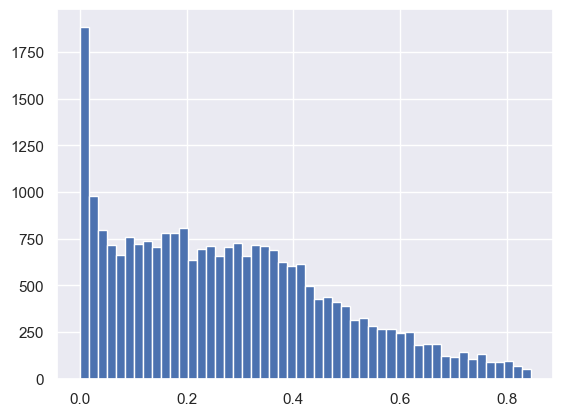

In [174]:
df_Services[(df_Services['LongFinancialLeverage'] < df_Services['LongFinancialLeverage'].quantile(.975)) & (df_Services['LongFinancialLeverage'] > df_Services['LongFinancialLeverage'].quantile(.025))]['LongFinancialLeverage'].hist(bins=50)

El histograma presenta un comporatmiento similar al anterior, pero con una distribución un poco más armónica entre datos, salvo el pico de más de 1800 de valor

In [175]:
df_Services['R'] = np.log(df_Services['adjprice'].astype(np.float)) - np.log(df_Services.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_Services['R']

C:\Users\Alex\AppData\Local\Temp\ipykernel_2492\3851138503.py:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



325            NaN
326            NaN
327            NaN
328            NaN
329       0.758321
            ...   
323721         NaN
323722         NaN
323723         NaN
323724         NaN
323725   -3.482115
Name: R, Length: 30784, dtype: float64

In [176]:
df_Services['R'].isnull().sum()

3113

In [177]:
df_Services['RNQ'] = df_Services.groupby(['firm'])['R'].shift(-1)

Se analizará la relación entre la variable dependiente (RNQ: retornos anuales continuos de una firma) y los valores corresponeidntes a la variable independiente (EPSP) y las tres variables de medición seleccionadas (Book to market ratio, Short financial leverage, Long financial leverage). 

Los puntos azules de las gráficas refieren a los valores de los factores mencionados; y la línea roja a la tasa de cambio promedio, comportándose como una pendiente en la gráfica.

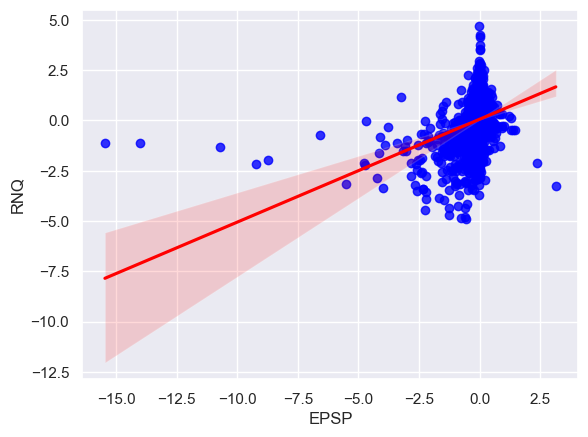

In [178]:
import seaborn as sns; sns.set_theme(color_codes=True)

x = sns.regplot(x="EPSP", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})


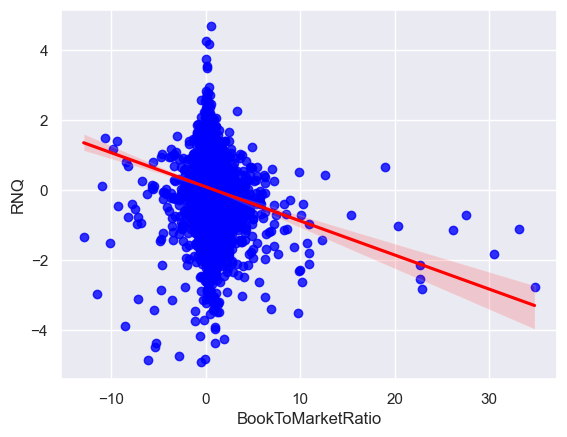

In [179]:
x = sns.regplot(x="BookToMarketRatio", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

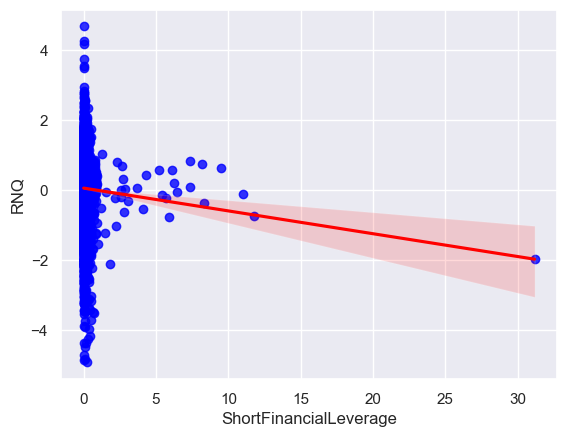

In [180]:
x = sns.regplot(x="ShortFinancialLeverage", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

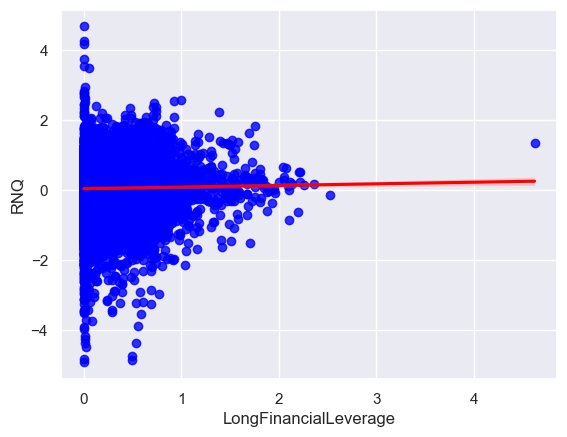

In [181]:
x = sns.regplot(x="LongFinancialLeverage", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Se muestra un resumen (media, desviación, estándar, valores mínimos/máximos, percentiles 25%-50%-70%) de los datos de cada uno de los factores involucrados con la función pandas.descibre(); previamente utilizada en pasos anteriores.

In [182]:
df_Services.groupby('Sector NAICS\nlevel 1')['EPSP'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.000441,0.086882,-2.090190,0.002551,0.009453,0.015101,0.769951
Administrative and Support and Waste Management and Remediation Services,5483.0,-0.004273,0.120937,-5.029408,0.000054,0.008319,0.014006,1.459035
"Arts, Entertainment, and Recreation",616.0,-0.014728,0.113274,-1.604833,-0.014838,0.003367,0.015723,0.179043
Educational Services,697.0,-0.005168,0.070065,-0.564628,-0.000100,0.009303,0.016841,0.267409
Health Care and Social Assistance,2262.0,-0.033143,0.295434,-10.719325,-0.018791,0.006603,0.014958,0.931305
Information,8767.0,-0.016482,0.232303,-9.230902,-0.006501,0.003044,0.011123,3.139017
Other Services (except Public Administration),719.0,-0.026489,0.210846,-3.774593,-0.003530,0.008724,0.015737,0.581818
"Professional, Scientific, and Technical Services",5094.0,-0.023253,0.269076,-14.018716,-0.008719,0.005433,0.012061,1.305551
Transportation and Warehousing,3772.0,-0.011767,0.309898,-15.457564,0.005757,0.012594,0.019378,2.365267


In [183]:
df_Services.groupby('Sector NAICS\nlevel 1')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.387211,0.509152,-1.279225,0.113126,0.265284,0.541144,6.347458
Administrative and Support and Waste Management and Remediation Services,5483.0,0.367533,0.614831,-11.469108,0.145777,0.298134,0.510748,7.228003
"Arts, Entertainment, and Recreation",616.0,0.335582,0.427338,-1.026576,0.033378,0.285142,0.540609,3.076717
Educational Services,697.0,0.590080,0.509338,-0.195304,0.257208,0.502143,0.788192,5.940190
Health Care and Social Assistance,2262.0,0.451662,0.766682,-12.916357,0.198295,0.355827,0.585452,6.363197
Information,8767.0,0.409983,0.632293,-9.812714,0.109836,0.263720,0.551094,10.902423
Other Services (except Public Administration),719.0,0.391026,0.619763,-4.858867,0.186486,0.390131,0.593318,5.189368
"Professional, Scientific, and Technical Services",5094.0,0.387205,0.835076,-10.101796,0.144247,0.311076,0.571189,26.225984
Transportation and Warehousing,3772.0,0.692097,1.584601,-10.923350,0.256123,0.481675,0.809073,34.816437


In [184]:
df_Services.groupby('Sector NAICS\nlevel 1')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2921.0,0.022788,0.036491,0.0,0.001105,0.010989,0.031369,0.746012
Administrative and Support and Waste Management and Remediation Services,5522.0,0.035633,0.119775,0.0,0.000000,0.008678,0.032651,4.287887
"Arts, Entertainment, and Recreation",622.0,0.070114,1.251303,0.0,0.005284,0.009718,0.021759,31.170158
Educational Services,704.0,0.017772,0.033285,0.0,0.000000,0.003452,0.022485,0.302018
Health Care and Social Assistance,2293.0,0.031978,0.061970,0.0,0.002917,0.012127,0.034997,1.483479
Information,8877.0,0.031666,0.095121,0.0,0.000000,0.005315,0.021296,1.244665
Other Services (except Public Administration),724.0,0.037336,0.075114,0.0,0.003226,0.012952,0.035715,1.077025
"Professional, Scientific, and Technical Services",5171.0,0.028669,0.074236,0.0,0.000000,0.005556,0.023041,0.771211
Transportation and Warehousing,3805.0,0.072287,0.495148,0.0,0.006368,0.024384,0.047999,11.767511


In [185]:
df_Services.groupby('Sector NAICS\nlevel 1')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,3013.0,0.441632,0.329902,0.0,0.215190,0.414233,0.599412,2.361017
Administrative and Support and Waste Management and Remediation Services,5569.0,0.224443,0.215647,0.0,0.021095,0.189195,0.367809,4.624883
"Arts, Entertainment, and Recreation",622.0,0.418627,0.317099,0.0,0.173288,0.331114,0.690787,1.314168
Educational Services,704.0,0.101852,0.139073,0.0,0.000000,0.046997,0.142013,0.677926
Health Care and Social Assistance,2293.0,0.303534,0.252789,0.0,0.081685,0.272793,0.490568,1.537161
Information,8883.0,0.219924,0.235084,0.0,0.004734,0.158083,0.363997,2.078265
Other Services (except Public Administration),724.0,0.348442,0.365168,0.0,0.136458,0.256049,0.397962,1.961249
"Professional, Scientific, and Technical Services",5171.0,0.180006,0.233842,0.0,0.000000,0.099088,0.286492,2.523174
Transportation and Warehousing,3805.0,0.259835,0.184831,0.0,0.121400,0.256823,0.378528,2.203046


**Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model**


*   **For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model**
*   **You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test**
Colinearidad: Hace referencia a cuando 2 variables independientes explicativas presentan una muy fuerte correlación; asiendo su coeficiente de correlación similar a 1.0

In [186]:
import statsmodels.api as sm

In [187]:
df_Services = df_Services.sort_values(by=['q','market_value'], ascending = True)
df_Services['size'] = df_Services.groupby(['q'])['market_value'].transform(lambda x: pd.qcut(x,3,labels = ['small', 'medium', 'big']))
df_Services[['size']].value_counts(sort = True)

size  
small     10159
big       10132
medium    10109
dtype: int64

In [188]:
x = ['size','EPSP']

model2 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     274.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.33e-175
Time:                        15:57:35   Log-Likelihood:                -20588.
No. Observations:               27594   AIC:                         4.118e+04
Df Residuals:                   27590   BIC:                         4.122e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0403      0.005     -7.499      

In [189]:
x = ['size','BookToMarketRatio']

model3 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.42e-142
Time:                        15:57:36   Log-Likelihood:                -20665.
No. Observations:               27594   AIC:                         4.134e+04
Df Residuals:                   27590   BIC:                         4.137e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0330      0.00

In [190]:
x = ['size','ShortFinancialLeverage']

model4 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.85e-142
Time:                        15:57:36   Log-Likelihood:                -20910.
No. Observations:               27544   AIC:                         4.183e+04
Df Residuals:                   27540   BIC:                         4.186e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [191]:
x = ['size','LongFinancialLeverage']

model5 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.19e-137
Time:                        15:57:36   Log-Likelihood:                -21017.
No. Observations:               27671   AIC:                         4.204e+04
Df Residuals:                   27667   BIC:                         4.207e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [192]:
copy = df_Services
copy = copy.dropna()
corr = copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP,R,RNQ
market_value,1.000000,0.758334,-0.047204,-0.008554,-0.015484,0.811738,0.184606,0.021237,0.050856,0.039537
book_value,0.758334,1.000000,0.019418,-0.012781,-0.040669,0.695649,0.160094,0.026077,0.017928,0.015681
BookToMarketRatio,-0.047204,0.019418,1.000000,-0.034908,-0.138681,-0.034017,-0.080821,-0.239754,-0.207576,-0.158828
ShortFinancialLeverage,-0.008554,-0.012781,-0.034908,1.000000,0.037721,-0.007280,-0.009721,-0.032921,-0.039132,-0.034507
LongFinancialLeverage,-0.015484,-0.040669,-0.138681,0.037721,1.000000,-0.017447,-0.015123,-0.009400,0.021506,0.018778
netincome,0.811738,0.695649,-0.034017,-0.007280,-0.017447,1.000000,0.310632,0.083981,0.056089,0.051230
EPS,0.184606,0.160094,-0.080821,-0.009721,-0.015123,0.310632,1.000000,0.316634,0.124416,0.110289
EPSP,0.021237,0.026077,-0.239754,-0.032921,-0.009400,0.083981,0.316634,1.000000,0.267096,0.226620
R,0.050856,0.017928,-0.207576,-0.039132,0.021506,0.056089,0.124416,0.267096,1.000000,0.737517
RNQ,0.039537,0.015681,-0.158828,-0.034507,0.018778,0.051230,0.110289,0.226620,0.737517,1.000000


In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [195]:
calculate_vif(df=copy, features=['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage'])

,VIF,Tolerance
EPSP,1.064882,0.939071
BookToMarketRatio,1.085491,0.921242
ShortFinancialLeverage,1.004026,0.995990
LongFinancialLeverage,1.022628,0.977873



*   **Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.**



In [196]:
x = ['size','EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']

modelF = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(modelF.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.56e-184
Time:                        15:57:37   Log-Likelihood:                -20464.
No. Observations:               27467   AIC:                         4.094e+04
Df Residuals:                   27460   BIC:                         4.100e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

**-Interpret your model**

Las 5 regresiones empleadas muestran valores relativamente similares; así como sus comportamientos.

El p value, salvo muy pocos casos, es prácticamente 0 redondeado a 3 dígitos. Por lo tanto, las variables rechazan la hipótesis nula; puesto que mientras más bajo, menos tendencia a la hipótesis nula hay. Por otro lado, los coeficientes se comportan de manera diferente entre sí. Variables como const, book to market ratio y short financial leverage presentan coeficientes negativos respecto a la variable independiente.

El valor de la R^2 se emplea para determinar la cercanía de los valores empleados respecto a la línea de regresión; mientras que R^2 ajustado es para determinar a manera de coeficiente la viabilidad de las variables independientes respecto a la variable dependiente de la regresión. En las 5 regresiones se presentan valores menores a un rango váldio y cercano a 1.0 para ambos coeficientes; por lo que significa que el modelo de regresión lineal no es válido, o al menos no lo es para los datos empleados. Probablemente se deba a una mala técnica de agrupación y procesamiento de datos. En adición a ello, la desviación estándar presenta coeficientes muy bajos; por lo que los valores de se acercan relativamente a la media de la población empleada para cada una de las variables dependientes.

Sin embargo, existen otros 2 valores a considerar que difieren ligeramente en el. El primero es el log-likelihood, que representa el encaje de los datos respecto al modelo. A mayor log-likelihood mayor será el encaje y validación de los datos. Al poseer valores literalmente negativos, significa que el set de datos empleado no cumple del todo con su fitting hacia el modelo; probablemente por alguna omisión dentro de la limpieza del mismo. El segundo coeficiente a considerar es el test de Durbin-Watson que sirve para corroborar los mínimos cuadrados ordinarios; método empleado en esta regresión lineal (OLS). Al presentar valores ligeramente mayores a 1, significa que la correlación planteada resulta positiva.
